# Random Forest Classification

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],
 columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

There is no data missing in this case and all the variable are int64 type, so there is no encoding required

## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
#split dataset in features and target variable
feature_cols = df.columns
feature_cols = feature_cols.drop('y')
X = df.iloc[:,:-1] # Features
y = df.iloc[:,-1] # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Basic Random Forest Classification

In [8]:
estimator = RandomForestClassifier(random_state=0, warm_start = True)
estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=0, warm_start=True)

In [9]:
pred_test = estimator.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

0.9629629629629629
0.9454545454545454
0.9338624338624338

 confusion matrix on validation data: 
[[ 57   6]
 [  4 104]]


## Evaluating Model

Confusion Matrix : 
 [[ 57   6]
 [  4 104]]
Accuracy Score is 0.9415
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC: 0.9338624338624338
LOGLOSS Value is 2.0198


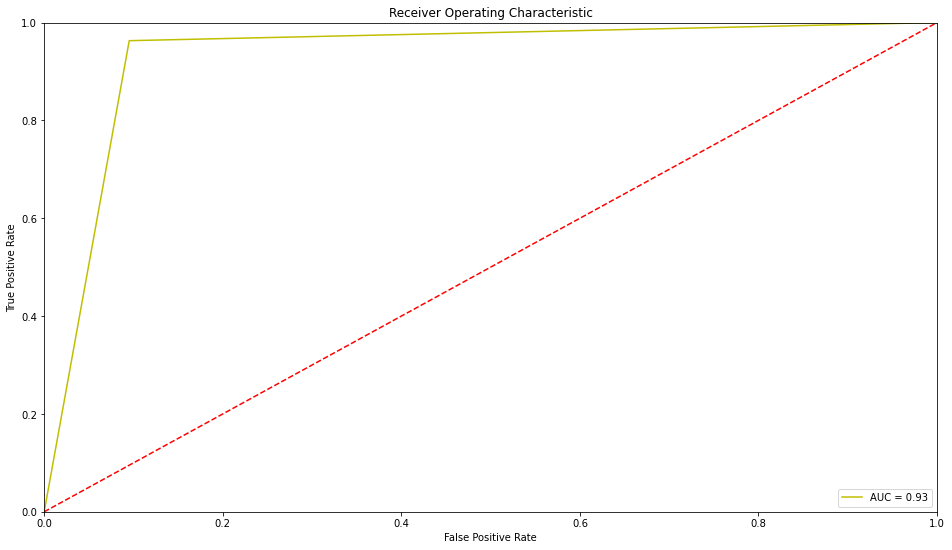

In [10]:
y_pred = estimator.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### With few changes in parameters

In [11]:
rf_tuned_parameters =  {"criterion": ["gini", "entropy"], "max_depth": [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

In [12]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.988, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.985, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=1.000, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.994, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.990, total=   0.2s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s



[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.987, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.985, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.994, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.987, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=50, score=0.983, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=50 ..............

[CV]  criterion=gini, max_depth=100, min_samples_leaf=50, score=0.992, total=   0.1s
[CV] criterion=gini, max_depth=100, min_samples_leaf=50 ..............
[CV]  criterion=gini, max_depth=100, min_samples_leaf=50, score=0.985, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, score=0.989, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, score=0.985, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, score=0.994, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=

[CV]  criterion=entropy, max_depth=100, min_samples_leaf=20, score=0.989, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=20 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=20, score=0.979, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=20 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=20, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=20 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=20, score=0.994, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=20 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=20, score=0.988, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=50 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=50, score=0.983, total=   0.2s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=50 ...........
[CV]  criterion=entropy, max_depth=100, min_sa

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   21.6s finished


GridSearchCV(estimator=RandomForestClassifier(random_state=0, warm_start=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [13]:
cv_grid.cv_results_

{'mean_fit_time': array([0.1792191 , 0.18333168, 0.14321065, 0.16981316, 0.16061158,
        0.16001139, 0.17400904, 0.15401101, 0.14661002, 0.15781164,
        0.17281246, 0.13800907, 0.16801648, 0.18146267, 0.1490109 ,
        0.21402502, 0.18301291, 0.16221242, 0.183813  , 0.16181207,
        0.16421232, 0.17461286, 0.17381196, 0.14780993]),
 'std_fit_time': array([0.0092883 , 0.02120233, 0.01471742, 0.01146233, 0.01358961,
        0.01741274, 0.01889626, 0.02244321, 0.01350071, 0.01412168,
        0.00391986, 0.00506037, 0.01284293, 0.00773332, 0.00994037,
        0.01650577, 0.00698682, 0.01103404, 0.0054563 , 0.01959039,
        0.00913073, 0.01059511, 0.01014954, 0.00248209]),
 'mean_score_time': array([0.01419501, 0.01300159, 0.01120086, 0.01220021, 0.01220012,
        0.01200113, 0.01340137, 0.01120119, 0.01240125, 0.01160111,
        0.01300106, 0.01080093, 0.01160116, 0.01260095, 0.01240158,
        0.01339746, 0.01300039, 0.01220164, 0.0124011 , 0.01240106,
        0.012001

In [14]:
best_parameters = cv_grid.best_estimator_.get_params()

In [15]:
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': True}

In [16]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	criterion: 'entropy'
	max_depth: 10
	min_samples_leaf: 10


In [17]:
pred_test = cv_grid.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

0.9444444444444444
0.9357798165137615
0.9166666666666666

 confusion matrix on validation data: 
[[ 56   7]
 [  6 102]]


## Evaluating Model

Confusion Matrix : 
 [[ 57   6]
 [  4 104]]
Accuracy Score is 0.9415
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC: 0.9338624338624338
LOGLOSS Value is 2.0198


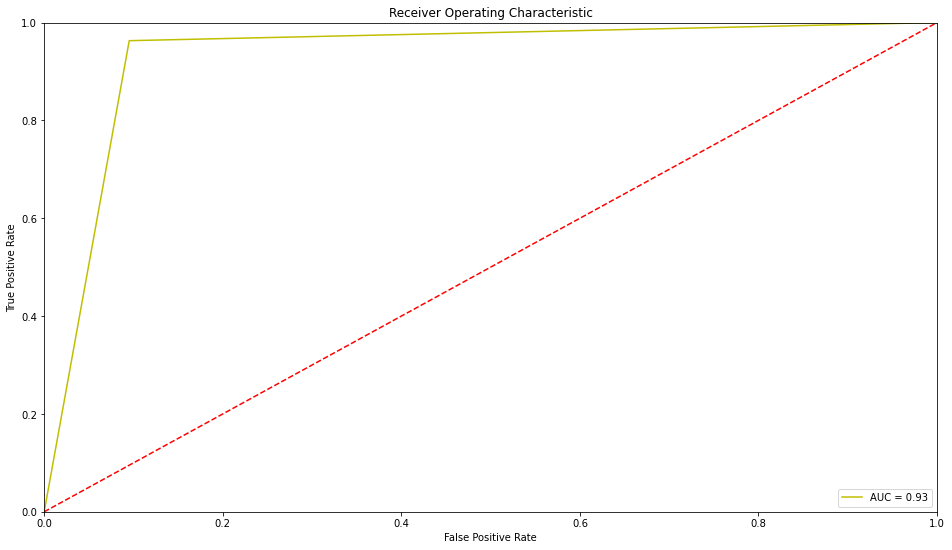

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# With changes in Parameters (for practice)

## RandomForestClassifier with class_weight

In [19]:
positive_weight = sum(y_train == 0) / sum(y_train == 1)  # size to repeat y == 1

estimator = RandomForestClassifier(random_state=0, class_weight = {0 : 1, 1 : positive_weight}, warm_start = True)
rf_tuned_parameters = {"max_depth": [10,20], 'n_estimators': [50], 'min_samples_leaf': [10]}

In [20]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.985, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.984, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.994, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.990, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.985, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.984, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.994, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.990, total=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1,
                                                            1: 0.5983935742971888},
                                              random_state=0, warm_start=True),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [10],
                         'n_estimators': [50]},
             scoring='roc_auc', verbose=5)

In [21]:
cv_grid.cv_results_

{'mean_fit_time': array([0.0952064 , 0.09760628]),
 'std_fit_time': array([0.01635242, 0.01608312]),
 'mean_score_time': array([0.00820112, 0.00780048]),
 'std_score_time': array([0.00097937, 0.00132639]),
 'param_max_depth': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 50],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50},
  {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 50}],
 'split0_test_score': array([0.98533333, 0.98533333]),
 'split1_test_score': array([0.984, 0.984]),
 'split2_test_score': array([1., 1.]),
 'split3_test_score': array([0.9937931, 0.9937931]),
 'split4_test_score': array([0.98979592, 0.989

In [22]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 0.5983935742971888},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': True}

In [23]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 50


In [24]:
pred_test = cv_grid.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

0.9259259259259259
0.9345794392523364
0.9074074074074074

 confusion matrix on validation data: 
[[ 56   7]
 [  8 100]]


### With few changes in parameters

In [25]:
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 'min_samples_leaf': [10, 20, 50]}

In [26]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.985, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.984, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.994, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=0.990, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=100 .............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.986, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=100 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.985, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=100 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=100, score=1.000, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=100 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.994, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=100 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=100, score=0.989, total=   0.2s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=200 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=200, score=0.987, total=   0.4s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=200 .............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=200,

[CV]  max_depth=10, min_samples_leaf=50, n_estimators=500, score=0.992, total=   0.7s
[CV] max_depth=10, min_samples_leaf=50, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=50, n_estimators=500, score=0.978, total=   0.8s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.985, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.984, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=0.994, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, scor

[CV]  max_depth=20, min_samples_leaf=50, n_estimators=200, score=0.976, total=   0.3s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=200 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=200, score=0.997, total=   0.3s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=200 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=200, score=0.992, total=   0.3s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=200 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=200, score=0.978, total=   0.4s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=500, score=0.982, total=   0.8s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=500, score=0.977, total=   0.7s
[CV] max_depth=20, min_samples_leaf=50, n_estimators=500 .............
[CV]  max_depth=20, min_samples_leaf=50, n_estimators=500,

[CV]  max_depth=50, min_samples_leaf=50, n_estimators=100, score=0.982, total=   0.2s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=100 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=100, score=0.973, total=   0.2s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=100 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=100, score=0.997, total=   0.2s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=100 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=100, score=0.992, total=   0.2s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=100 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=100, score=0.980, total=   0.2s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=200, score=0.981, total=   0.4s
[CV] max_depth=50, min_samples_leaf=50, n_estimators=200 .............
[CV]  max_depth=50, min_samples_leaf=50, n_estimators=200,

[CV]  max_depth=100, min_samples_leaf=20, n_estimators=500, score=0.993, total=   0.9s
[CV] max_depth=100, min_samples_leaf=20, n_estimators=500 ............
[CV]  max_depth=100, min_samples_leaf=20, n_estimators=500, score=0.984, total=   0.7s
[CV] max_depth=100, min_samples_leaf=50, n_estimators=50 .............
[CV]  max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.981, total=   0.1s
[CV] max_depth=100, min_samples_leaf=50, n_estimators=50 .............
[CV]  max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.981, total=   0.1s
[CV] max_depth=100, min_samples_leaf=50, n_estimators=50 .............
[CV]  max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.997, total=   0.1s
[CV] max_depth=100, min_samples_leaf=50, n_estimators=50 .............
[CV]  max_depth=100, min_samples_leaf=50, n_estimators=50, score=0.992, total=   0.1s
[CV] max_depth=100, min_samples_leaf=50, n_estimators=50 .............
[CV]  max_depth=100, min_samples_leaf=50, n_estimators=5

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.4min finished


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1,
                                                            1: 0.5983935742971888},
                                              random_state=0, warm_start=True),
             param_grid={'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [27]:
cv_grid.cv_results_

{'mean_fit_time': array([0.11321235, 0.19741468, 0.353227  , 0.80486183, 0.0780056 ,
        0.15081015, 0.30142269, 0.78485928, 0.07460418, 0.14601016,
        0.3046217 , 0.72785587, 0.08380628, 0.1738133 , 0.32642512,
        0.79005976, 0.0744071 , 0.15921202, 0.31842413, 0.8088624 ,
        0.06900554, 0.14261189, 0.30382328, 0.7468574 , 0.08580647,
        0.17021375, 0.31802464, 0.80906115, 0.08500571, 0.17021284,
        0.29842267, 0.74685678, 0.07080574, 0.16560469, 0.31502442,
        0.73465605, 0.07500482, 0.15361085, 0.33622546, 0.85986524,
        0.08420639, 0.16881289, 0.29202223, 0.79306073, 0.0716054 ,
        0.15721183, 0.27602129, 0.75965867]),
 'std_fit_time': array([0.01738767, 0.04840955, 0.012352  , 0.05947345, 0.00572697,
        0.00444481, 0.01504344, 0.05937189, 0.00631262, 0.010451  ,
        0.0255492 , 0.04497219, 0.00890733, 0.00601486, 0.02343436,
        0.0375533 , 0.00480131, 0.01062849, 0.02110698, 0.0382364 ,
        0.00505999, 0.01197748, 0.020

In [28]:
best_parameters = cv_grid.best_estimator_.get_params()

In [29]:
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 0.5983935742971888},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': True}

In [30]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 500


In [31]:
pred_test = cv_grid.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

0.9259259259259259
0.9345794392523364
0.9074074074074074

 confusion matrix on validation data: 
[[ 56   7]
 [  8 100]]


## Self-defined Score and GridSearchCV of hyperparameter

In [32]:
def scoring(ground_truth, predictions):
    '''
    based on results above about the average loss from false positive and false negative predictions.
    '''
    cmatrix = confusion_matrix(ground_truth, predictions)
    fp = cmatrix[0, 1]
    fn = cmatrix[1, 0]
    return  fn * 122 + fp * 1.76

In [33]:
wt_loss_score = make_scorer(scoring, greater_is_better = False)

In [34]:
estimator = RandomForestClassifier(random_state=0, warm_start = True)
rf_tuned_parameters = {"max_depth": [10,20], 'n_estimators': [50], 'min_samples_leaf': [10]}

In [35]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = wt_loss_score, verbose = 5)
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=-369.520, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=-495.040, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=-5.280, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=-369.520, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, n_estimators=50, score=-127.280, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=-369.520, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=-495.040, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=-5.280, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=-369.520, total=   0.1s
[CV] max_depth=20, min_samples_leaf=10, n_estimators=50 ..............
[CV]  max_depth=20, min_samples_leaf=10, n_estimators=50, score=-127.280, total=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


GridSearchCV(estimator=RandomForestClassifier(random_state=0, warm_start=True),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [10],
                         'n_estimators': [50]},
             scoring=make_scorer(scoring, greater_is_better=False), verbose=5)

In [36]:
cv_grid.cv_results_

{'mean_fit_time': array([0.089606  , 0.08740735]),
 'std_fit_time': array([0.01036607, 0.00241646]),
 'mean_score_time': array([0.00780015, 0.00719986]),
 'std_score_time': array([0.001722 , 0.0004005]),
 'param_max_depth': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 50],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50},
  {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 50}],
 'split0_test_score': array([-369.52, -369.52]),
 'split1_test_score': array([-495.04, -495.04]),
 'split2_test_score': array([-5.28, -5.28]),
 'split3_test_score': array([-369.52, -369.52]),
 'split4_test_score': array([-127.28, -127.28]),

In [37]:
best_parameters = cv_grid.best_estimator_.get_params()

In [38]:
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': True}

In [39]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 50


In [40]:
pred_test = cv_grid.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

0.9444444444444444
0.9357798165137615
0.9166666666666666

 confusion matrix on validation data: 
[[ 56   7]
 [  6 102]]
